In [21]:
import os
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from matrix import Matrix, print_table

%matplotlib inline

In [3]:
A = np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8)
B = np.array([[1,2,5],[3,12,4],[0,5,0]], dtype=np.uint8)

In [4]:
A @ B

array([[  7,  41,  13],
       [ 24, 125,  43],
       [ 15,  65,  20]], dtype=uint8)

In [5]:
(A == B).all()

False

In [6]:
np.random.randint(3, size=(3, 3), dtype=np.uint8)

array([[1, 1, 0],
       [0, 0, 1],
       [1, 1, 0]], dtype=uint8)

In [7]:
np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8).reshape(-1)

array([1, 2, 3, 3, 7, 7, 0, 5, 1], dtype=uint8)

In [8]:
hash(tuple(np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8).reshape(-1)))

-2518969009246642181

In [9]:
pow(3, 9)

19683

## The reference (slow) version

In [10]:
def one_step(s):

    def mat_mul(i):
        return i[0] * i[1]

    products = itertools.product(s, s)
    new_s = map(mat_mul, products)
    return s.union(new_s)

A = Matrix(idx = 2)
B = Matrix(idx = 5)
C = Matrix(idx = 100)
result = one_step({A, B, C})

sorted(list(map(lambda x:x.idx(), result)))

[1, 2, 5, 7, 11, 14, 100]

In [11]:
def floodfill(s):
    last = s
    for i in range(100000):
        print(f'step #{i}, {len(last)}')
        new = one_step(last)
        if new == last or len(new) == pow(3, 9):
            last = new
            break
        last = new
    print(f'done, {len(last)}')
    return set(map(lambda x:x.idx(), last))

In [12]:
A = Matrix(idx = 2)
print(A)
B = Matrix(idx = 100)
print(B)
C = Matrix(idx = 1001)
print(C)
s = {A, B, C}

result = floodfill(s)
print(result)
print()
print_table(result)

[[2 0 0]
 [0 0 0]
 [0 0 0]]
[[1 0 2]
 [0 1 0]
 [0 0 0]]
[[2 0 0]
 [1 0 1]
 [1 0 0]]
step #0, 3
step #1, 9
step #2, 19
done, 19
{1, 2, 11, 271, 8335, 19, 532, 28, 13862, 14375, 1459, 308, 56, 731, 100, 8038, 1001, 1513, 758}

011000000001000000010000000010000000000000000000000000001000000000000000000000000
000000000000000000010000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000010000000000000000000000000000000000001000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000010000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
0010000000000000000000000000010000000

## Multi-processing acceleratesfor 64-core CPUs

In [13]:
from multiprocess import one_step_by_idx

def floodfill_by_idx(s):
    last = s
    for i in range(100000):
        print(f'step #{i}, {len(last)}')
        new = one_step_by_idx(last)
        if new == last or len(new) == pow(3, 9):
            last = new
            break
        last = new
    print(f'done, {len(last)}')
    return last

In [14]:
s = {1, 11000, 13000}
result = floodfill_by_idx(s)
# print(result)
print()
print_table(result)

step #0, 3
step #1, 11
step #2, 63
step #3, 474
step #4, 2936
step #5, 8427
step #6, 8464
done, 8464

111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111111111111111111111111111111111111111111111111111111111111111111111111111
111111111000000000000000000111111111000000000000000000111111111000000000000000

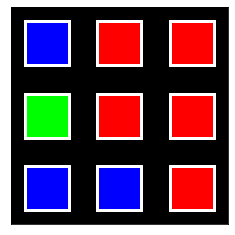

In [26]:
_color_map = {
    0 : (1, 0, 0),
    1 : (0, 1, 0),
    2 : (0, 0, 1),
}

def render(idx):
    matrix = Matrix(idx=idx)

    plt.figure()
    plt.axes(aspect='equal')
    plt.ylim(-0.5, 2.5)
    plt.xlim(-0.5, 2.5)

    for i, j in [(i, j) for i in range(3) for j in range(3)]:
      color = _color_map[matrix.m[i][j]]
      plt.plot(i, j, 's', color=color, markeredgecolor='w', markeredgewidth=3, ms=44)

    ax = plt.gca()
    ax.set_facecolor('k')
    plt.xticks([])
    plt.yticks([])

    plt.savefig(os.path.join('images', f'{idx}.png'))
    plt.show()
    
render(77)

## What is the index of Identity matrix?

In [ ]:
I = Matrix(idx = 6643)
print(I)